## Llibreries utilitzades

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from dataloader_module import load_data
from metrics_module import metrics
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc
from dataloader_module import extreure_columnes


## Càrrega i pre-processament de les dades

In [12]:

# Càrrega i pre-processament de les dades
datafile = "../data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

# Dividir les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Creació i test de KNN

Millor threshold: 0.201, Millor score: 1.337931829535411
Accuracy: 0.7719
Precision: 0.1299
Recall: 0.5660
F1 Score: 0.2113


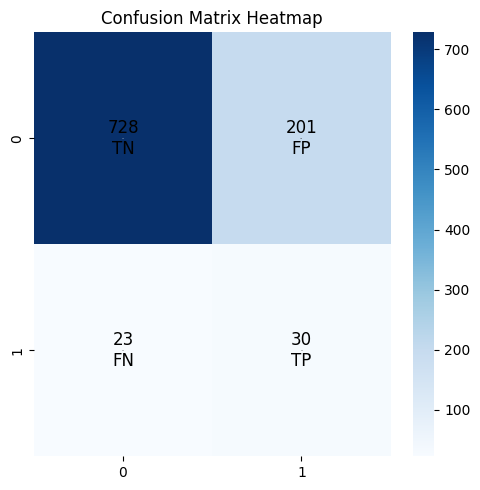

In [13]:

# Entrenar el model KNN amb les dades equilibrades
clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)

y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


## ROC Curve i AUC

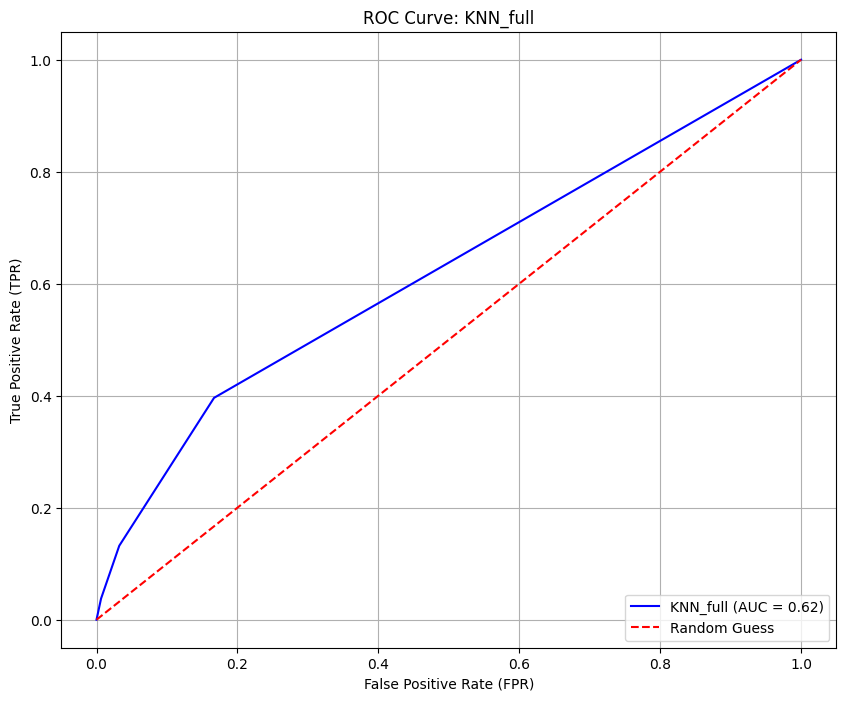

KNN_full AUC Score: 0.62


In [14]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="KNN_full")

## Treient les característiques



Millor threshold: 0.001, Millor score: 1.1236790531452945
Accuracy: 0.8218
Precision: 0.1039
Recall: 0.3019
F1 Score: 0.1546


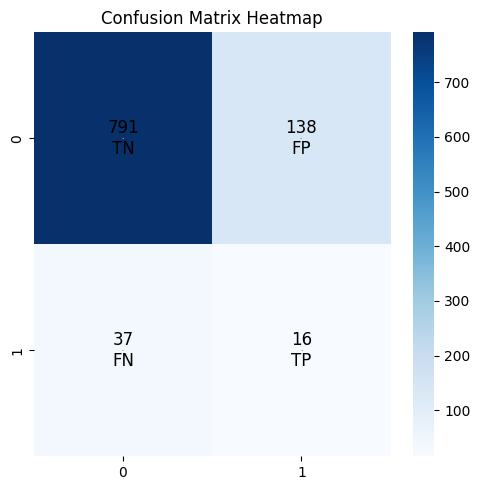

In [15]:
X,y = extreure_columnes(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

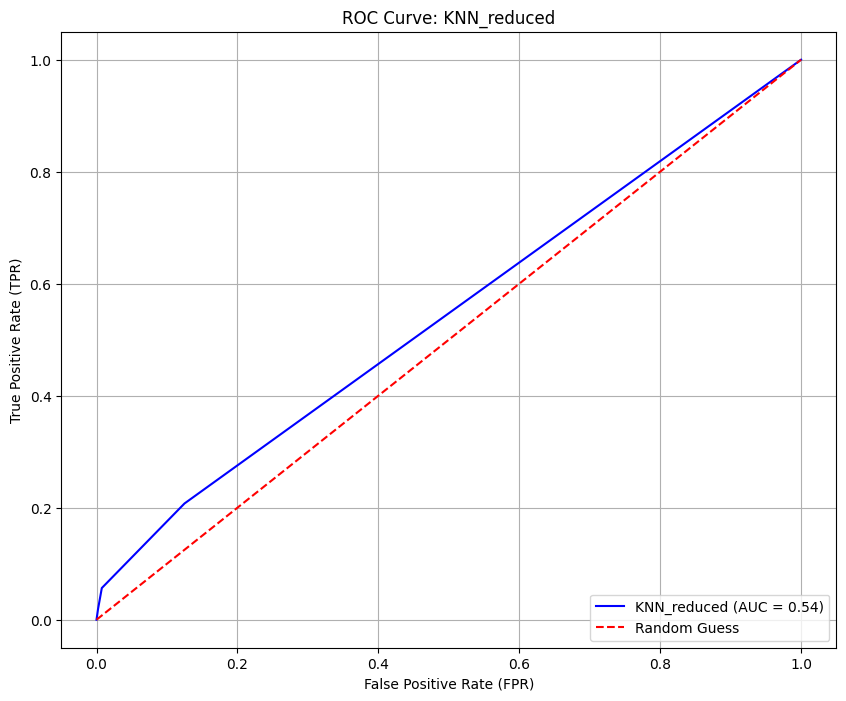

KNN_reduced AUC Score: 0.54


In [16]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="KNN_reduced")